In [182]:
#Global Shark Attack
#1. avoid potentially dangerous situations in the water.
#2. Rank most dangerous area, specific geographical areas and their indigenous species of sharks. 
#3.  species behavior, and specific patterns emerge, activities

#Columns
#'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex', 'Age',
#'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 
#'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23'

import numpy as np 
import pandas as pd 
import calendar
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier


import warnings
warnings.filterwarnings('ignore')

In [183]:
#1. Check shpae, organize, rename if necessary
#2. drop duplicates
#3. take care of nulls (drop the fulls raws with NANS and  Unnamed 22 and 23, href formula', 'href',)
#4. fill up the other NANS with information / specid Nans with average in that area.
#5. concat both sets ¿?
#6. rank attacks activities
#7. rank area/location
#8. top of type of sharks
#9. compare activty with injury
#10. year and month with most attacks and where
#11. how much fatal and region 
#12. create necesary visuals
#13 prevision of attacks related to activities in future years...???? that could be interesting... i just think that this
# is defined with other dataset... 

In [184]:
data = pd.read_csv('archive/attacks.csv', encoding='latin1')
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
data.shape

(25723, 24)

In [186]:
data.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [187]:
data_copy = data
columns_to_drop = ['Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23']  #these columns either are full with NANS, not relevant info or like Case Number 2 that seems duplicated
columns_to_drop_stripped = [col.strip() for col in columns_to_drop]
data = data.drop(columns_to_drop, axis=1)

In [188]:
print(data.columns)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Case Number.1'],
      dtype='object')


In [189]:
data.isna().sum()

Case Number      17021
Date             19421
Year             19423
Type             19425
Country          19471
Area             19876
Location         19961
Activity         19965
Name             19631
Sex              19986
Age              22252
Injury           19449
Fatal (Y/N)      19960
Time             22775
Species          22259
Case Number.1    19421
dtype: int64

In [190]:
data.dropna(axis = 0, how = 'all', inplace = True)
data.isna().sum()

Case Number         1
Date             2401
Year             2403
Type             2405
Country          2451
Area             2856
Location         2941
Activity         2945
Name             2611
Sex              2966
Age              5232
Injury           2429
Fatal (Y/N)      2940
Time             5755
Species          5239
Case Number.1    2401
dtype: int64

In [191]:
data.shape

(8703, 16)

In [192]:
data = data.drop_duplicates()

In [193]:
data.shape

(6304, 16)

In [194]:
data.size

100864

In [195]:
data.isna().sum()

Case Number         1
Date                2
Year                4
Type                6
Country            52
Area              457
Location          542
Activity          546
Name              212
Sex               567
Age              2833
Injury             30
Fatal (Y/N)       541
Time             3356
Species          2840
Case Number.1       2
dtype: int64

In [196]:
column_name = 'Year'

# Calculate the average of the column
average_value = data[column_name].mean()

# Fill the missing values in the column with the average value
data[column_name].fillna(average_value, inplace=True)

In [197]:
columns_to_fill = ['Case Number', 'Date', 'Type' , 'Case Number.1']

# Iterate over each column and fill missing values with the mode value to find the averge of the string
for col in columns_to_fill:
    mode_value = data[col].mode().values[0]
    data[col].fillna(mode_value, inplace=True)

In [198]:
columns_to_fill = [ 'Sex ', 'Age', 'Activity', 'Time', 'Species ' ]

# Filling missing values in object columns with a specific string value
fill_value = 'Unknown'
data[columns_to_fill] = data[columns_to_fill].fillna(fill_value)

In [199]:
len(data)

6304

In [200]:
data.isna().sum()

Case Number        0
Date               0
Year               0
Type               0
Country           52
Area             457
Location         542
Activity           0
Name             212
Sex                0
Age                0
Injury            30
Fatal (Y/N)      541
Time               0
Species            0
Case Number.1      0
dtype: int64

In [201]:
#try to connect location to country and then drop nans

mapping_dict = data.set_index(['Country', 'Area'])['Location'].to_dict()

# Fill the NaN values in 'Location' based on the corresponding country and area
data['Location'] = data.apply(lambda row: mapping_dict.get((row['Country'], row['Area']), row['Location']), axis=1)

In [202]:
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Case Number.1
0,2018.06.25,25-Jun-2018,2018.000000,Boating,USA,California,"Capistrano, Orange County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,2018.06.25
1,2018.06.18,18-Jun-2018,2018.000000,Unprovoked,USA,Georgia,Cumberland Island,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,2018.06.18
2,2018.06.09,09-Jun-2018,2018.000000,Invalid,USA,Hawaii,Puna,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Unknown,2018.06.09
3,2018.06.08,08-Jun-2018,2018.000000,Unprovoked,AUSTRALIA,New South Wales,,Surfing,male,M,Unknown,Minor injury to lower leg,N,Unknown,2 m shark,2018.06.08
4,2018.06.04,04-Jun-2018,2018.000000,Provoked,MEXICO,Colima,Manzanillo,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",2018.06.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,ND.0003,1900-1905,0.000000,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,Unknown,FATAL,Y,Unknown,Unknown,ND.0003
6300,ND.0002,1883-1889,0.000000,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",Unknown,Jules Patterson,M,Unknown,FATAL,Y,Unknown,Unknown,ND.0002
6301,ND.0001,1845-1853,0.000000,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,Unknown,Unknown,ND.0001
6302,0,1957,1927.272381,Unprovoked,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,NaN,Unknown,Unknown,1907.10.16.R


In [203]:
new_data = data.dropna()
data.dropna(inplace=True)

In [204]:
data.isna().sum()

Case Number      0
Date             0
Year             0
Type             0
Country          0
Area             0
Location         0
Activity         0
Name             0
Sex              0
Age              0
Injury           0
Fatal (Y/N)      0
Time             0
Species          0
Case Number.1    0
dtype: int64

In [205]:
data.shape

(4736, 16)

In [206]:
new_data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Case Number.1
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Capistrano, Orange County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,2018.06.25
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,Cumberland Island,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,2018.06.18
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,Puna,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Unknown,2018.06.09
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,,Surfing,male,M,Unknown,Minor injury to lower leg,N,Unknown,2 m shark,2018.06.08
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,Manzanillo,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",2018.06.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6290,ND.0012,Before 19-Jul-1913,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Wading,a young Scotsman,M,Unknown,"FATAL, leg stripped of flesh",Y,Unknown,Unknown,ND.0012
6292,ND.0010,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,Unknown,"A ""chiefess""",F,Unknown,Ankle bitten,N,Unknown,Unknown,ND.0010
6296,ND.0006,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,Unknown,FATAL,Y,Unknown,Said to involve a grey nurse shark that leapt ...,ND.0006
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,Unknown,FATAL,Y,Unknown,Unknown,ND.0003


In [207]:
# Sorting the data by the 'Count' column in descending order
shark_counts = data.groupby('Species ').size().reset_index(name='Count')
shark_counts = shark_counts.sort_values(by='Count', ascending=False)
shark_counts = shark_counts.head(10)
print(shark_counts)

              Species   Count
1085           Unknown   2212
1090       White shark    125
987        Tiger shark     61
592         Bull shark     41
371           4' shark     38
440           6' shark     34
137   1.8 m [6'] shark     33
101   1.5 m [5'] shark     31
313           3' shark     26
79    1.2 m [4'] shark     24


In [208]:
ranked_attacks = data.groupby(['Activity', 'Country'])['Injury'].agg(['sum', 'count']).reset_index()
ranked_attacks.columns = ['Activity', 'Country', 'Total Injury', 'Occurrences']

ranked_attacks = ranked_attacks.sort_values(by='Total Injury', ascending=False)
ranked_attacks_top20 = ranked_attacks.head(20)

ranked_attacks_top20 = ranked_attacks_top20.sort_values(by='Total Injury', ascending=False)

ranked_attacks_top20 = ranked_attacks_top20.reset_index(drop=True)

print(ranked_attacks_top20)

                                             Activity   
0                                     Hardhat diving   \
1                                              Wading   
2                                    Diving for pearl   
3                             Collecting beche-de-mer   
4                        Picking up shark by the tail   
5                                           Oystering   
6                Fell overboard from SS Ripley Castle   
7               Spearfishing, but swimming at surface   
8                Windsurfing (urinating on his board)   
9                               Snorkeling on surface   
10                                            Fishing   
11    Free diving for abalone from Zodiac (submerged)   
12                                       Spearfishing   
13                                  Swimming / Wading   
14               Snorkeling (filming the sardine run)   
15                                      Kite boarding   
16                   Boat capsi

In [209]:
#Most commun activity
activity_counts = data['Activity'].value_counts()
most_common_activity = activity_counts.index[0]
occurrences = activity_counts[0]
most_common_activity_data = data[data['Activity'] == most_common_activity]
countries = most_common_activity_data['Country'].unique()
print("Most Common Activity:", most_common_activity)
print("Occurrences:", occurrences)
print("Country:", countries)

Most Common Activity: Surfing
Occurrences: 863
Country: ['USA' 'AUSTRALIA' 'SOUTH AFRICA' 'BAHAMAS' 'BRAZIL' 'JAPAN'
 'ST HELENA, British overseas territory' 'FRENCH POLYNESIA' 'INDONESIA'
 'COSTA RICA' 'REUNION' 'NEW ZEALAND' 'ECUADOR' 'SCOTLAND' 'FIJI'
 'UNITED ARAB EMIRATES (UAE)' 'NEW CALEDONIA' 'MEXICO' 'MEXICO ' 'URUGUAY'
 'VENEZUELA' 'OKINAWA' 'MOZAMBIQUE' 'EL SALVADOR']


In [210]:
# is surfing fatal 
activity_counts = data['Activity'].value_counts()
most_common_activity = activity_counts.index[0]

if 'Fatal (Y/N)' in data.columns:
   
    most_common_activity_fatal_data = data[(data['Activity'] == most_common_activity) & (data['Fatal (Y/N)'] == 'Y')]
    most_common_activity_nonfatal_data = data[(data['Activity'] == most_common_activity) & (data['Fatal (Y/N)'] == 'N')]
    
    fatal_occurrences = len(most_common_activity_fatal_data)
    nonfatal_occurrences = len(most_common_activity_nonfatal_data)
    
    fatal_countries = most_common_activity_fatal_data['Country'].unique()
    nonfatal_countries = most_common_activity_nonfatal_data['Country'].unique()
    
 
    print("Most Common Activity:", most_common_activity)
    print("Fatal Occurrences:", fatal_occurrences)
    print("Fatal Countries:", fatal_countries)
    print("Non-Fatal Occurrences:", nonfatal_occurrences)
    print("Non-Fatal Countries:", nonfatal_countries)
else:
    print("Fatal information not available in the DataFrame.")

Most Common Activity: Surfing
Fatal Occurrences: 37
Fatal Countries: ['REUNION' 'AUSTRALIA' 'USA' 'SOUTH AFRICA' 'COSTA RICA' 'NEW CALEDONIA'
 'MEXICO' 'BRAZIL' 'NEW ZEALAND' 'OKINAWA' 'EL SALVADOR']
Non-Fatal Occurrences: 823
Non-Fatal Countries: ['USA' 'AUSTRALIA' 'SOUTH AFRICA' 'BAHAMAS' 'BRAZIL' 'JAPAN'
 'ST HELENA, British overseas territory' 'FRENCH POLYNESIA' 'INDONESIA'
 'COSTA RICA' 'REUNION' 'NEW ZEALAND' 'ECUADOR' 'SCOTLAND' 'FIJI'
 'UNITED ARAB EMIRATES (UAE)' 'MEXICO' 'NEW CALEDONIA' 'MEXICO ' 'URUGUAY'
 'VENEZUELA' 'MOZAMBIQUE' 'EL SALVADOR']


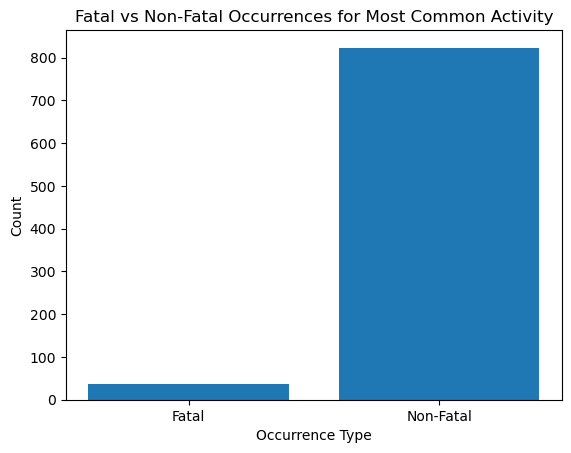

In [211]:
#show the graphic
activity_counts = data['Activity'].value_counts()
most_common_activity = activity_counts.index[0]

if 'Fatal (Y/N)' in data.columns:

    most_common_activity_fatal_data = data[(data['Activity'] == most_common_activity) & (data['Fatal (Y/N)'] == 'Y')]
    most_common_activity_nonfatal_data = data[(data['Activity'] == most_common_activity) & (data['Fatal (Y/N)'] == 'N')]
    
 
    fatal_occurrences = len(most_common_activity_fatal_data)
    nonfatal_occurrences = len(most_common_activity_nonfatal_data)
    
    
    fatal_countries = most_common_activity_fatal_data['Country'].unique()
    nonfatal_countries = most_common_activity_nonfatal_data['Country'].unique()
    
 
    labels = ['Fatal', 'Non-Fatal']
    values = [fatal_occurrences, nonfatal_occurrences]
    
    #bar plot
    plt.bar(labels, values)
    plt.xlabel('Occurrence Type')
    plt.ylabel('Count')
    plt.title('Fatal vs Non-Fatal Occurrences for Most Common Activity')
    

    plt.show()
else:
    print("Fatal information not available in the Data.")

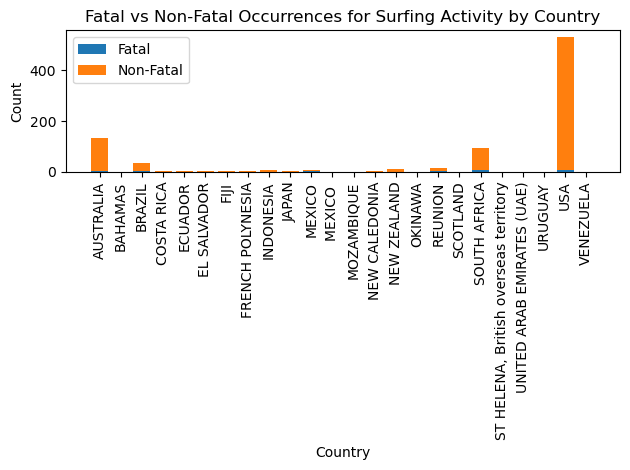

In [212]:
surfing_data = data[data['Activity'] == 'Surfing']

if 'Fatal (Y/N)' in surfing_data.columns:
    
    fatal_data = surfing_data[surfing_data['Fatal (Y/N)'] == 'Y']
    nonfatal_data = surfing_data[surfing_data['Fatal (Y/N)'] == 'N']
    
 
    fatal_counts = fatal_data['Country'].value_counts()
    nonfatal_counts = nonfatal_data['Country'].value_counts()
    
 
    countries = fatal_counts.index.union(nonfatal_counts.index)
    fatal_values = [fatal_counts.get(country, 0) for country in countries]
    nonfatal_values = [nonfatal_counts.get(country, 0) for country in countries]
    
   
    plt.bar(countries, fatal_values, label='Fatal')
    plt.bar(countries, nonfatal_values, bottom=fatal_values, label='Non-Fatal')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.title('Fatal vs Non-Fatal Occurrences for Surfing Activity by Country')
    plt.legend()
    

    plt.xticks(rotation=90)
    plt.tight_layout()
    
 
    plt.show()
else:
    print("Fatal information not available for the Surfing activity.")

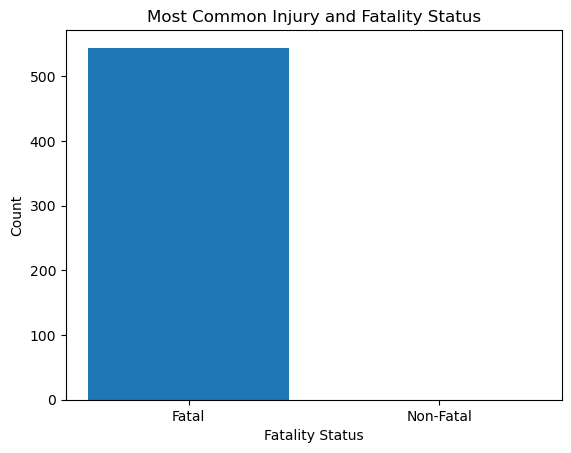

In [213]:
# Most common Unjury and its fatal or not

injury_counts = data['Injury'].value_counts()
most_common_injury = injury_counts.index[0]
most_common_injury_data = data[data['Injury'] == most_common_injury]

if 'Fatal (Y/N)' in most_common_injury_data.columns:
    fatality_status = most_common_injury_data['Fatal (Y/N)'].unique()[0]
    
  
    labels = ['Fatal', 'Non-Fatal']
    values = [len(most_common_injury_data[most_common_injury_data['Fatal (Y/N)'] == 'Y']),
              len(most_common_injury_data[most_common_injury_data['Fatal (Y/N)'] == 'N'])]
    

    plt.bar(labels, values)
    plt.xlabel('Fatality Status')
    plt.ylabel('Count')
    plt.title('Most Common Injury and Fatality Status')
    
  
    plt.show()
else:
    print("Fatal information not available for the most common injury.")

In [214]:
#TOP 10 FATAL ACTIVITIES

fatal_data = data[data['Fatal (Y/N)'] == 'Y']

fatal_activity_counts = fatal_data['Activity'].value_counts()
top_10_fatal_activities = fatal_activity_counts.head(10)

print(top_10_fatal_activities)

Activity
Swimming         260
Unknown           69
Bathing           59
Surfing           37
Spearfishing      33
Fishing           30
Swimming          20
Standing          14
Body boarding     12
Diving            12
Name: count, dtype: int64


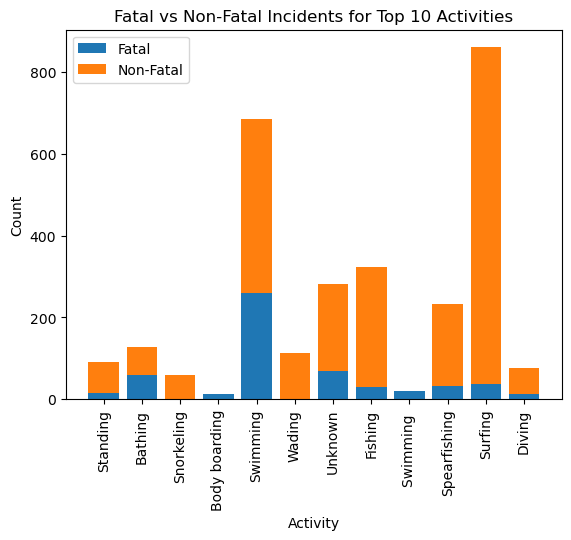

In [215]:
#top 10 fatal vs non fatal
fatal_data = data[data['Fatal (Y/N)'] == 'Y']
non_fatal_data = data[data['Fatal (Y/N)'] == 'N']


fatal_activity_counts = fatal_data['Activity'].value_counts().head(10)
non_fatal_activity_counts = non_fatal_data['Activity'].value_counts().head(10)


activities = list(set(fatal_activity_counts.index) | set(non_fatal_activity_counts.index))

fatal_counts = [fatal_activity_counts.get(activity, 0) for activity in activities]
non_fatal_counts = [non_fatal_activity_counts.get(activity, 0) for activity in activities]


plt.bar(activities, fatal_counts, label='Fatal')
plt.bar(activities, non_fatal_counts, bottom=fatal_counts, label='Non-Fatal')


plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Fatal vs Non-Fatal Incidents for Top 10 Activities')
plt.xticks(rotation=90)
plt.legend()


plt.show()

Fatal (Y/N)
N          3697
Y           996
UNKNOWN      35
 N            5
M             1
2017          1
N             1
Name: count, dtype: int64
Fatal (Y/N)
N          78.061655
Y          21.030405
UNKNOWN     0.739020
 N          0.105574
M           0.021115
2017        0.021115
N           0.021115
Name: count, dtype: float64


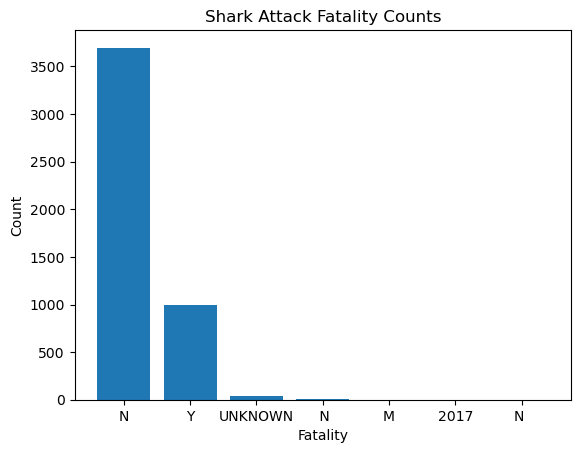

In [216]:
fatality_counts = data['Fatal (Y/N)'].value_counts()


fatality_percentages = fatality_counts / fatality_counts.sum() * 100


print(fatality_counts)
print(fatality_percentages)

plt.bar(fatality_counts.index, fatality_counts)


plt.xlabel('Fatality')
plt.ylabel('Count')
plt.title('Shark Attack Fatality Counts')


plt.show()


In [217]:
activity_counts = data['Activity'].value_counts()


most_common_activity = activity_counts.idxmax()

print(f"The activity that will happen most in the future is: {most_common_activity}")

The activity that will happen most in the future is: Surfing


In [219]:
clf = DummyClassifier(strategy='most_frequent')
clf.fit(data[['Activity']], data['Activity'])

prediction = clf.predict([[None]]) 
print(f"The activity that will happen most in the future is: {prediction[0]}")

The activity that will happen most in the future is: Surfing


In [224]:
#convert date

new_data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

new_data['Date'] =new_data['Date'].dt.strftime('%Y-%m-%d')


print(new_data)

     Case Number        Date    Year        Type             Country   
0     2018.06.25  2018-06-25  2018.0     Boating                 USA  \
1     2018.06.18  2018-06-18  2018.0  Unprovoked                 USA   
2     2018.06.09  2018-06-09  2018.0     Invalid                 USA   
3     2018.06.08  2018-06-08  2018.0  Unprovoked           AUSTRALIA   
4     2018.06.04  2018-06-04  2018.0    Provoked              MEXICO   
...          ...         ...     ...         ...                 ...   
6290     ND.0012         NaN     0.0  Unprovoked        SOUTH AFRICA   
6292     ND.0010         NaN     0.0  Unprovoked                 USA   
6296     ND.0006         NaN     0.0  Unprovoked           AUSTRALIA   
6299     ND.0003         NaN     0.0  Unprovoked                 USA   
6301     ND.0001         NaN     0.0  Unprovoked  CEYLON (SRI LANKA)   

                  Area                             Location     Activity   
0           California            Capistrano, Orange County